In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 12.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 303.5 kB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039288 sha256=6bc4611de49391478cee56fe51215792cdb3d19c21ca4eb742b8ab5d71faa8db
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap

In [ ]:
%%time
from bertopic import BERTopic
from umap import UMAP
import pandas as pd


CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 25.3 µs


In [ ]:
df=pd.read_csv('/content/drive/My Drive/CIS509/american.csv')

In [ ]:
df.head()

,business_id,name,category,stars,text
0,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,I am an avid customer. The specialty breadstic...
1,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,"If you love healthy and fresh food, then this ..."
2,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,Only salad bar on campus (besides from the din...
3,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,The butternut squash soup blew my mind and I w...
4,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,negative,beware do not eat here!! \n\ni ate here with m...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  6328 non-null   object
 1   name         6328 non-null   object
 2   category     6328 non-null   object
 3   stars        6328 non-null   object
 4   text         6328 non-null   object
dtypes: object(5)
memory usage: 247.3+ KB


In [ ]:
# Build the Topic Model
from bertopic.representation import KeyBERTInspired
# Define the four topics
zeroshot_topic_list = ["price", "wait", "quality", "service"]
# Use UMAP model
umap_model = UMAP(n_neighbors=5,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
topic_model = BERTopic(
    umap_model = umap_model,
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.8,
    representation_model=KeyBERTInspired()
)
topics, _ = topic_model.fit_transform(df.text)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,1450,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...
1,1,234,wait,"[food, waited, waiting, wait, seated, place, w...",[Mixed feelings overall; somewhere between thr...
2,2,187,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...
3,3,91,quality,"[restaurant, food, eat, reviews, delicious, qu...",[I've had hit and miss experiences at other Na...
4,4,1179,-1_restaurant_delicious_food_breakfast,"[restaurant, delicious, food, breakfast, place...",[I was very very excited to try this place. \n...
...,...,...,...,...,...
173,173,6,168_restaurant_barbara_foodies_chefs,"[restaurant, barbara, foodies, chefs, santa, c...",[Absolutely amazing!\n\nCute place in downtown...
174,174,5,169_breakfast_restaurants_gluten_celiacs,"[breakfast, restaurants, gluten, celiacs, celi...",[We come up to watch our son on the mens volle...
175,175,5,170_thai_restaurant_thailand_delicious,"[thai, restaurant, thailand, delicious, food, ...",[I'm a fan...and one that plans to return to t...
176,176,5,171_waiter_servings_dinning_delicious,"[waiter, servings, dinning, delicious, dinner,...",[This place was absolutely delicious. We came ...


In [ ]:
# Dataframe the get_document_info
topic_df = topic_model.get_document_info(df.text)
topic_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,I am an avid customer. The specialty breadstic...,3,quality,"[restaurant, food, eat, reviews, delicious, qu...",[I've had hit and miss experiences at other Na...,restaurant - food - eat - reviews - delicious ...,False
1,"If you love healthy and fresh food, then this ...",40,35_vegetarian_food_veggie_lunch,"[vegetarian, food, veggie, lunch, vegetarians,...",[I definitely recommend coming here on a Sunda...,vegetarian - food - veggie - lunch - vegetaria...,False
2,Only salad bar on campus (besides from the din...,2,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...,restaurant - food - pricey - breakfast - price...,False
3,The butternut squash soup blew my mind and I w...,65,60_breakfast_smoothies_smoothie_yummy,"[breakfast, smoothies, smoothie, yummy, eat, y...","[This place is a fun, cute, hipster place and ...",breakfast - smoothies - smoothie - yummy - eat...,False
4,beware do not eat here!! \n\ni ate here with m...,164,159_poisoning_food_vomiting_eat,"[poisoning, food, vomiting, eat, nauseous, eat...",[Went to Olivers with a friend for an early Su...,poisoning - food - vomiting - eat - nauseous -...,True
...,...,...,...,...,...,...,...
6323,"We have eated at Garden Market several times, ...",40,35_vegetarian_food_veggie_lunch,"[vegetarian, food, veggie, lunch, vegetarians,...",[I definitely recommend coming here on a Sunda...,vegetarian - food - veggie - lunch - vegetaria...,False
6324,We've stopped here twice on road trips. The fo...,156,151_coffee_latte_breakfast_drink,"[coffee, latte, breakfast, drink, annoyed, dri...",[I go here to get coffee and my fav breakfast ...,coffee - latte - breakfast - drink - annoyed -...,True
6325,What horrible customer service. No one greeted...,2,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...,restaurant - food - pricey - breakfast - price...,False
6326,I love to come here when we're visiting Carpin...,92,87_restaurant_café_drinks_dinning,"[restaurant, café, drinks, dinning, food, ranc...","[This place is a no frills, totally laid back ...",restaurant - café - drinks - dinning - food - ...,True


In [ ]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6328 entries, 0 to 6327
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Document                 6328 non-null   object
 1   Topic                    6328 non-null   int64 
 2   Name                     6328 non-null   object
 3   Representation           6328 non-null   object
 4   Representative_Docs      6328 non-null   object
 5   Top_n_words              6328 non-null   object
 6   Representative_document  6328 non-null   bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 352.2+ KB


In [ ]:
# Rename topic_df column name 'document' to 'text'

topic_df = topic_df.rename(columns={'Document': 'text'})
topic_df

,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,I am an avid customer. The specialty breadstic...,3,quality,"[restaurant, food, eat, reviews, delicious, qu...",[I've had hit and miss experiences at other Na...,restaurant - food - eat - reviews - delicious ...,False
1,"If you love healthy and fresh food, then this ...",40,35_vegetarian_food_veggie_lunch,"[vegetarian, food, veggie, lunch, vegetarians,...",[I definitely recommend coming here on a Sunda...,vegetarian - food - veggie - lunch - vegetaria...,False
2,Only salad bar on campus (besides from the din...,2,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...,restaurant - food - pricey - breakfast - price...,False
3,The butternut squash soup blew my mind and I w...,65,60_breakfast_smoothies_smoothie_yummy,"[breakfast, smoothies, smoothie, yummy, eat, y...","[This place is a fun, cute, hipster place and ...",breakfast - smoothies - smoothie - yummy - eat...,False
4,beware do not eat here!! \n\ni ate here with m...,164,159_poisoning_food_vomiting_eat,"[poisoning, food, vomiting, eat, nauseous, eat...",[Went to Olivers with a friend for an early Su...,poisoning - food - vomiting - eat - nauseous -...,True
...,...,...,...,...,...,...,...
6323,"We have eated at Garden Market several times, ...",40,35_vegetarian_food_veggie_lunch,"[vegetarian, food, veggie, lunch, vegetarians,...",[I definitely recommend coming here on a Sunda...,vegetarian - food - veggie - lunch - vegetaria...,False
6324,We've stopped here twice on road trips. The fo...,156,151_coffee_latte_breakfast_drink,"[coffee, latte, breakfast, drink, annoyed, dri...",[I go here to get coffee and my fav breakfast ...,coffee - latte - breakfast - drink - annoyed -...,True
6325,What horrible customer service. No one greeted...,2,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...,restaurant - food - pricey - breakfast - price...,False
6326,I love to come here when we're visiting Carpin...,92,87_restaurant_café_drinks_dinning,"[restaurant, café, drinks, dinning, food, ranc...","[This place is a no frills, totally laid back ...",restaurant - café - drinks - dinning - food - ...,True


In [ ]:
# Merge df and topic_df on the column 'text'

import pandas as pd
merged_df = pd.merge(df, topic_df, on='text')
merged_df.head()


,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,I am an avid customer. The specialty breadstic...,3,quality,"[restaurant, food, eat, reviews, delicious, qu...",[I've had hit and miss experiences at other Na...,restaurant - food - eat - reviews - delicious ...,False
1,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,"If you love healthy and fresh food, then this ...",40,35_vegetarian_food_veggie_lunch,"[vegetarian, food, veggie, lunch, vegetarians,...",[I definitely recommend coming here on a Sunda...,vegetarian - food - veggie - lunch - vegetaria...,False
2,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,Only salad bar on campus (besides from the din...,2,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...,restaurant - food - pricey - breakfast - price...,False
3,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,The butternut squash soup blew my mind and I w...,65,60_breakfast_smoothies_smoothie_yummy,"[breakfast, smoothies, smoothie, yummy, eat, y...","[This place is a fun, cute, hipster place and ...",breakfast - smoothies - smoothie - yummy - eat...,False
4,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,negative,beware do not eat here!! \n\ni ate here with m...,164,159_poisoning_food_vomiting_eat,"[poisoning, food, vomiting, eat, nauseous, eat...",[Went to Olivers with a friend for an early Su...,poisoning - food - vomiting - eat - nauseous -...,True


In [ ]:
# Select the four topics price, wait, service, and quality

filtered_df = merged_df[merged_df['Name'].isin(['price', 'wait', 'service', 'quality'])]


In [ ]:
filtered_df

,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,I am an avid customer. The specialty breadstic...,3,quality,"[restaurant, food, eat, reviews, delicious, qu...",[I've had hit and miss experiences at other Na...,restaurant - food - eat - reviews - delicious ...,False
2,SHk_eYKzIOPvgwvTThtXiQ,Romaine's,American,positive,Only salad bar on campus (besides from the din...,2,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...,restaurant - food - pricey - breakfast - price...,False
6,sxuv5uZU15UHGT_HB1xYxQ,Islands Restaurant,American,positive,Brandon Ravens was the best server. He made us...,0,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...,restaurant - food - service - server - table -...,False
7,sxuv5uZU15UHGT_HB1xYxQ,Islands Restaurant,American,positive,Chain restaurant but their menu options are go...,0,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...,restaurant - food - service - server - table -...,False
8,sxuv5uZU15UHGT_HB1xYxQ,Islands Restaurant,American,positive,The cheddar fries are quite delicious and the ...,0,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...,restaurant - food - service - server - table -...,False
...,...,...,...,...,...,...,...,...,...,...,...
6339,cOoTIQ0RcudE1R5aRVZzdw,The Garden Market,American,positive,Oh how I miss my beach days in Santa Barbara! ...,1,wait,"[food, waited, waiting, wait, seated, place, w...",[Mixed feelings overall; somewhere between thr...,food - waited - waiting - wait - seated - plac...,False
6340,cOoTIQ0RcudE1R5aRVZzdw,The Garden Market,American,negative,I enjoy The Garden Market because of the back ...,0,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...,restaurant - food - service - server - table -...,False
6344,cOoTIQ0RcudE1R5aRVZzdw,The Garden Market,American,negative,Beautiful spot but distracted service. An exp...,0,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...,restaurant - food - service - server - table -...,False
6347,cOoTIQ0RcudE1R5aRVZzdw,The Garden Market,American,negative,"Have never stayed to eat, always do takeout. ...",0,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...,restaurant - food - service - server - table -...,False


In [ ]:
# See the distribution of negative review and positive review of each restaurant

restaurant_counts = filtered_df.groupby('name')['stars'].value_counts().unstack()
restaurant_counts


stars,negative,positive
name,,
Angel Oak,1.0,8.0
Backyard Bowls,51.0,76.0
Barbareño,15.0,36.0
Bevmo,4.0,8.0
Bluewater Grill - Santa Barbara,124.0,256.0
Bossie's Kitchen,1.0,1.0
California Pizza Kitchen at Santa Barbara,21.0,20.0
Cold Spring Tavern,45.0,152.0
Dank Bowl Kitchen,2.0,28.0


In [ ]:
# See the distribution in percentages

restaurant_percentages = (100 * filtered_df.groupby('name')['stars'].value_counts().unstack().div(filtered_df.groupby('name')['stars'].value_counts().unstack().sum(axis=1), axis=0)).round(1).astype(str) + '%'
restaurant_percentages


stars,negative,positive
name,,
Angel Oak,11.1%,88.9%
Backyard Bowls,40.2%,59.8%
Barbareño,29.4%,70.6%
Bevmo,33.3%,66.7%
Bluewater Grill - Santa Barbara,32.6%,67.4%
Bossie's Kitchen,50.0%,50.0%
California Pizza Kitchen at Santa Barbara,51.2%,48.8%
Cold Spring Tavern,22.8%,77.2%
Dank Bowl Kitchen,6.7%,93.3%


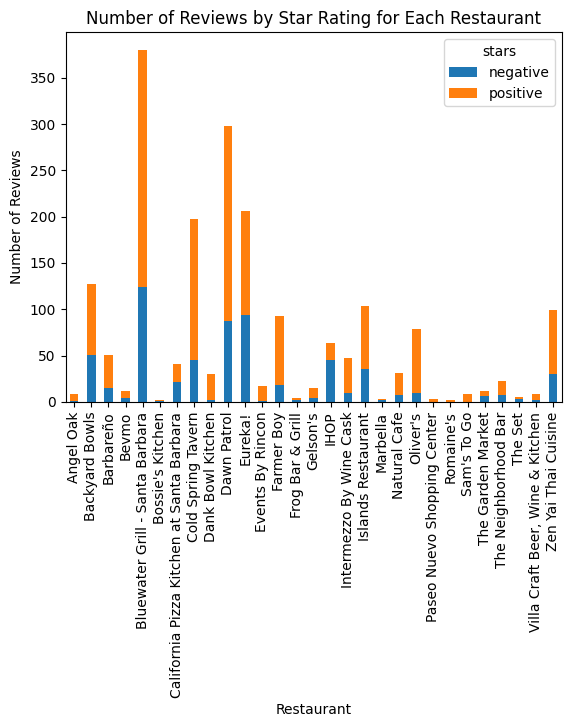

In [ ]:
# Visualize the distribution of negative and positive reviews of each restaurant
import matplotlib.pyplot as plt

unique_stars_count = filtered_df.groupby('name')['stars'].value_counts().unstack()

unique_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
# Distribution of the negative and positive review in each four topics

topic_counts = filtered_df.groupby('Name')['stars'].value_counts().unstack()
topic_counts

stars,negative,positive
Name,,
price,87,100
quality,20,71
service,351,1105
wait,169,67


In [ ]:
# Distribution in Percentage format

topic_percentages = (100 * restaurant_counts.div(restaurant_counts.sum(axis=1), axis=0)).round(1).astype(str) + '%'
topic_percentages


stars,negative,positive
name,,
Angel Oak,11.1%,88.9%
Backyard Bowls,40.2%,59.8%
Barbareño,29.4%,70.6%
Bevmo,33.3%,66.7%
Bluewater Grill - Santa Barbara,32.6%,67.4%
Bossie's Kitchen,50.0%,50.0%
California Pizza Kitchen at Santa Barbara,51.2%,48.8%
Cold Spring Tavern,22.8%,77.2%
Dank Bowl Kitchen,6.7%,93.3%


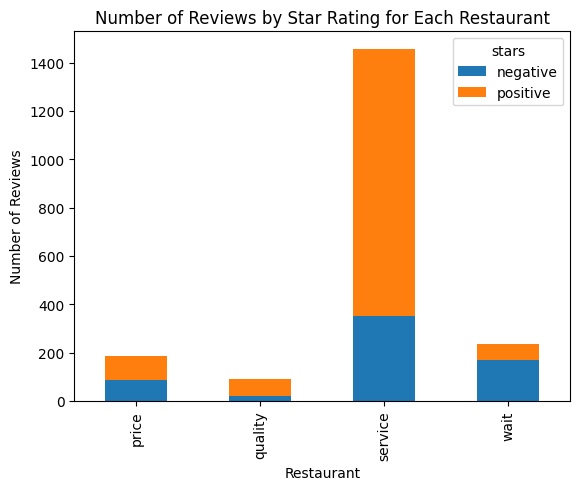

In [ ]:
# Visualize the distribution
topic_stars_count = filtered_df.groupby('Name')['stars'].value_counts().unstack()

topic_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Visualize the top 10 words in each four topics
topic_model.visualize_barchart(top_n_topics=4,n_words=20,height = 500)

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(4)

Number of topics: 178


,Topic,Count,Name,Representation,Representative_Docs
0,0,1450,service,"[restaurant, food, service, server, table, exp...",[I loved the food. It tasted very fresh and su...
1,1,234,wait,"[food, waited, waiting, wait, seated, place, w...",[Mixed feelings overall; somewhere between thr...
2,2,187,price,"[restaurant, food, pricey, breakfast, prices, ...",[My company and I came here after visiting San...
3,3,91,quality,"[restaurant, food, eat, reviews, delicious, qu...",[I've had hit and miss experiences at other Na...


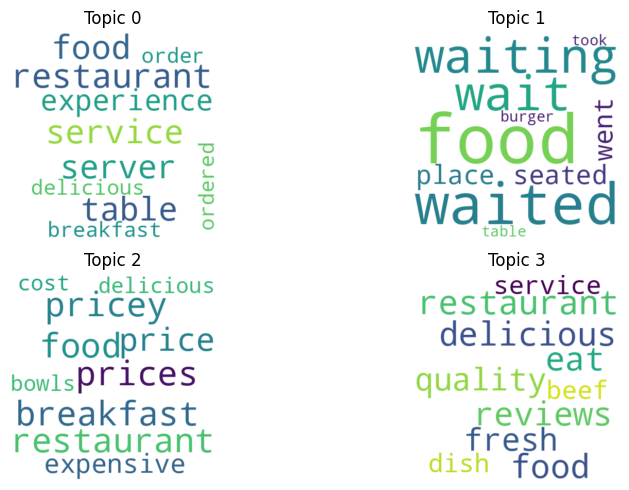

In [ ]:
# Create word clouds for the first four topics
number_of_topics = 4
topics_to_visualize = freq.iloc[0:number_of_topics]["Topic"]

# Set up the figure size for four subplots
plt.figure(figsize=(10, 5))

# Loop through the topics and add a subplot for each word cloud
for i, topic_number in enumerate(topics_to_visualize, start=1):
    # Get the words and their frequencies for the current topic
    topic_words = dict(topic_model.get_topic(topic_number))

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate_from_frequencies(topic_words)

    # Add a new subplot in a 2x2 grid
    ax = plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_number}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
